# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

### Importando bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [2]:
conn = psycopg2.connect(host="localhost",database="bd1", user="postgres", password="postgres")

## Obtendo dados do database com Pandas

# RELATÓRIO DO SISTEMA MAPA DE RISCO

### CONSULTA DA RUA PESQUISADA PELO USUÁRIO:


In [ ]:
    O usuário preenche, através do aplicativo, três campos para pesquisar uma rua: cidade, estado e a rua. A necessidade 
de outros campos além da rua veio a partir da descoberta de ruas com os mesmos nomes porém localizadas em cidades ou 
bairros diferentes.
    A classifcicação de uma rua é determinada através da quantidade de crimes ocorridos na mesma:
        - 0 crimes: classificação do tipo A
        - 1 crimes: classificação do tipo B
        - 2 crimes: classificação do tipo C
        - 3 crimes: classificação do tipo D
        - 4 crimes ou mais: classificação do tipo E
    
    Cada uma das classificações, além de uma letra, recebe um texto padrão que descreve o nível de segurança.
        - tipo A: ALTAMENTE SEGURO
        - tipo B: SEGURO
        - tipo C: INTERMEDIARIO
        - tipo D: PERIGOSO
        - tipo E: ALTAMENTE PERIGOSO

#### EXEMPLOS DE CONSULTAS DE RUAS PESQUISADAS POR UM USUÁRIO:


In [4]:
rua = pd.read_sql_query("""select ru.id,ru.nome_rua,ba.nome_bairro,ci.nome_cidade,ru.quantidade_crimes,cl.tipo,de.textopadrao
                            from rua ru inner join bairro ba on (ru.id_bairro = ba.id) 
                            inner join cidade ci on (ru.id_cidade = ci.id)
                            inner join classificacao cl on (ru.id_classificacao = cl.id) 
                            inner join descricao de on(ru.id_classificacao = de.id)
                            where ru.nome_rua = 'POEIRAO' and ba.nome_bairro = 'DO MOSCOSO' 
                            and ci.nome_cidade = 'VITORIA'""",conn)

rua2 = pd.read_sql_query("""select ru.id,ru.nome_rua,ba.nome_bairro,ci.nome_cidade,ru.quantidade_crimes,cl.tipo,de.textopadrao
                            from rua ru inner join bairro ba on (ru.id_bairro = ba.id) 
                            inner join cidade ci on (ru.id_cidade = ci.id)
                            inner join classificacao cl on (ru.id_classificacao = cl.id) 
                            inner join descricao de on(ru.id_classificacao = de.id)
                            where ru.nome_rua = 'AV CARLOS LINDENBERG' and ba.nome_bairro = 'COBI DE BAIXO' 
                            and ci.nome_cidade = 'VILA VELHA'""",conn)

rua3 = pd.read_sql_query("""select ru.id,ru.nome_rua,ba.nome_bairro,ci.nome_cidade,ru.quantidade_crimes,cl.tipo,de.textopadrao
                            from rua ru inner join bairro ba on (ru.id_bairro = ba.id) 
                            inner join cidade ci on (ru.id_cidade = ci.id)
                            inner join classificacao cl on (ru.id_classificacao = cl.id) 
                            inner join descricao de on(ru.id_classificacao = de.id)
                            where ru.nome_rua = 'RUA AGUA MARINHA' and ba.nome_bairro = 'PONTAL DE SANTA MONICA' 
                            and ci.nome_cidade = 'GUARAPARI'""",conn)

In [5]:
rua

,id,nome_rua,nome_bairro,nome_cidade,quantidade_crimes,tipo,textopadrao
0,38,POEIRAO,DO MOSCOSO,VITORIA,4,E,ALTAMENTE PERIGOSO


In [6]:
rua2

,id,nome_rua,nome_bairro,nome_cidade,quantidade_crimes,tipo,textopadrao
0,160,AV CARLOS LINDENBERG,COBI DE BAIXO,VILA VELHA,1,B,SEGURO


In [7]:
rua3

,id,nome_rua,nome_bairro,nome_cidade,quantidade_crimes,tipo,textopadrao
0,73,RUA AGUA MARINHA,PONTAL DE SANTA MONICA,GUARAPARI,2,C,INTERMEDIÁRIO


#### EXEMPLOS DE CONSULTAS DOS CRIMES OCORRIDOS NAS RUAS PESQUISADAS:


In [51]:
res = pd.read_sql_query("""SELECT cr.id,cr.data,cr.hora,vi.idade,se.genero,tc.descricao_crime FROM crime cr 
                        INNER JOIN vitima vi ON(cr.id_vitima = vi.id) INNER JOIN sexo se ON(vi.id_sexo = se.id)
                        INNER JOIN tipo_crime tc ON(cr.id_tipo_crime = tc.id)
                        WHERE cr.id_rua = 38 ORDER BY cr.data""",conn)
res2 = pd.read_sql_query("""SELECT cr.id,cr.data,cr.hora,vi.idade,se.genero,tc.descricao_crime FROM crime cr 
                        INNER JOIN vitima vi ON(cr.id_vitima = vi.id) INNER JOIN sexo se ON(vi.id_sexo = se.id)
                        INNER JOIN tipo_crime tc ON(cr.id_tipo_crime = tc.id)
                        WHERE cr.id_rua = 160 ORDER BY cr.data""",conn)
res3 = pd.read_sql_query("""SELECT cr.id,cr.data,cr.hora,vi.idade,se.genero,tc.descricao_crime FROM crime cr 
                        INNER JOIN vitima vi ON(cr.id_vitima = vi.id) INNER JOIN sexo se ON(vi.id_sexo = se.id)
                        INNER JOIN tipo_crime tc ON(cr.id_tipo_crime = tc.id)
                        WHERE cr.id_rua = 73 ORDER BY cr.data""",conn)

In [52]:
res

,id,data,hora,idade,genero,descricao_crime
0,42,2019-01-14,13:58:00,22,M,HOMICÍDIO DOLOSO
1,40,2019-01-14,01:00:00,23,M,HOMICÍDIO DOLOSO
2,39,2019-01-14,06:03:00,18,M,LATROCÍNIO
3,86,2019-01-28,20:16:00,23,M,HOMICÍDIO DOLOSO


In [12]:
res2

,id,data,hora,idade,genero,descricao_crime
0,90,2019-01-29,06:45:00,26,M,HOMICÍDIO DOLOSO


In [53]:
res3

,id,data,hora,idade,genero,descricao_crime
0,80,2019-01-27,06:00:00,35,F,HOMICÍDIO DOLOSO
1,79,2019-01-27,22:45:00,35,M,HOMICÍDIO DOLOSO


### ESTRUTURA DA BASE DE DADOS

In [ ]:
    A tabela crime é a principal tabela do nosso sistema, através dela conseguimos obter informações como data, hora,
tipo do crime, rua, bairro, cidade e a vitima. Primeiramente iremos mostrar a estrutura da tabela crime e de suas tabelas
relacionadas.

In [35]:
crimes = pd.read_sql_query("""SELECT * FROM crime  LIMIT 5""",conn)
vitimas = pd.read_sql_query("""SELECT * FROM vitima LIMIT 5""",conn)
sexo = pd.read_sql_query("""SELECT * FROM sexo""",conn)
ruas = pd.read_sql_query("""SELECT * FROM rua ORDER BY nome_rua ASC LIMIT 5""",conn)
bairros = pd.read_sql_query("""SELECT * FROM bairro ORDER BY nome_bairro ASC LIMIT 5""",conn)
cidades = pd.read_sql_query("""SELECT * FROM cidade ORDER BY nome_cidade ASC LIMIT 5""",conn)
tipo_crime = pd.read_sql_query("""SELECT * FROM tipo_crime""",conn)


In [36]:
crimes

,id,data,hora,id_vitima,id_rua,id_bairro,id_cidade,id_tipo_crime
0,1,2019-01-01,20:49:00,31,144,19,51,1
1,2,2019-01-01,00:00:00,32,153,16,77,1
2,3,2019-01-02,15:34:00,28,115,56,17,1
3,4,2019-01-02,16:01:00,7,78,81,70,1
4,5,2019-01-02,16:11:00,5,100,27,78,1


In [37]:
vitimas

,id,idade,id_sexo
0,1,59,2
1,2,26,1
2,3,25,1
3,4,20,2
4,5,28,1


In [38]:
sexo

,id,genero
0,1,M
1,2,F


In [39]:
ruas

,id,nome_rua,quantidade_crimes,id_classificacao,id_bairro,id_cidade
0,88,AV FERNANDO JOGAIDER,1,2,75,68
1,49,AV ANESIO JOSE SIMOES,1,2,16,77
2,160,AV CARLOS LINDENBERG,1,2,61,77
3,108,AV FRANCA,2,3,5,77
4,163,AV LOURIVAL NUNES,1,2,26,70


In [40]:
bairros

,id,nome_bairro,id_cidade
0,70,ALTOE,53
1,17,ALZIRA RAMOS,17
2,15,ANGELA DEPOLLO,49
3,18,ARIBIRI,77
4,74,BARRA DE SAO FRANCISCO,12


In [41]:
cidades

,id,nome_cidade
0,1,AFONSO CLAUDIO
1,3,AGUA DOCE DO NORTE
2,2,AGUIA BRANCA
3,4,ALEGRE
4,5,ALFREDO CHAVES


In [43]:
tipo_crime

,id,descricao_crime
0,1,HOMICÍDIO DOLOSO
1,2,LATROCÍNIO
2,3,LESÃO CORPORAL SEGUIDO DE MORTE


### LEVANTAMENTO DE ESTATISTICAS RELACIONADAS AOS CRIMES

In [15]:
adolescentes = pd.read_sql_query("""SELECT cr.id,cr.data,cr.hora,vi.idade,se.genero,tc.descricao_crime FROM crime cr 
                            INNER JOIN vitima vi ON(cr.id_vitima =vi.id)
                            INNER JOIN tipo_crime tc ON(cr.id_tipo_crime = tc.id)
                            INNER JOIN sexo se ON(se.id = vi.id_sexo)
                            WHERE id_vitima IN(SELECT id FROM vitima WHERE idade < 18)""",conn)

qtd_adolescentes = pd.read_sql_query("""SELECT COUNT(*) AS qtd_adolescentes FROM crime cr
                                INNER JOIN vitima vi ON(cr.id_vitima = vi.id)
                                WHERE idade < 18""",conn)

idosos = pd.read_sql_query("""SELECT cr.id,cr.data,cr.hora,vi.idade,se.genero,tc.descricao_crime FROM crime cr 
                            INNER JOIN vitima vi ON(cr.id_vitima =vi.id)
                            INNER JOIN tipo_crime tc ON(cr.id_tipo_crime = tc.id)
                            INNER JOIN sexo se ON(se.id = vi.id_sexo)
                            WHERE id_vitima IN(SELECT id FROM vitima WHERE idade > 60)""",conn)

qtd_idosos = pd.read_sql_query("""SELECT COUNT(*) AS qtd_idosos FROM crime cr
                                INNER JOIN vitima vi ON(cr.id_vitima = vi.id)
                                WHERE idade > 60""",conn)


mulheres = pd.read_sql_query("""SELECT cr.id,cr.data,cr.hora,vi.idade,se.genero,tc.descricao_crime FROM crime cr 
                            INNER JOIN vitima vi ON(cr.id_vitima =vi.id)
                            INNER JOIN tipo_crime tc ON(cr.id_tipo_crime = tc.id)
                            INNER JOIN sexo se ON(se.id = vi.id_sexo)
                            WHERE id_vitima IN(SELECT id FROM vitima WHERE id_sexo = 2)""",conn)

qtd_mulheres = pd.read_sql_query("""SELECT COUNT(*) AS qtd_mulheres FROM crime cr
                                INNER JOIN vitima vi ON(cr.id_vitima = vi.id)
                                WHERE id_sexo = 2""",conn)

qtd_homens = pd.read_sql_query("""SELECT COUNT(*) AS qtd_homens FROM crime cr
                                INNER JOIN vitima vi ON(cr.id_vitima = vi.id)
                                WHERE id_sexo = 1""",conn)

total = pd.read_sql_query("""SELECT COUNT(*) AS total FROM crime;""",conn)

relacao1 = pd.read_sql_query("""SELECT 
                        (SELECT COUNT(*) FROM crime cr INNER JOIN vitima vi ON(cr.id_vitima = vi.id) WHERE id_sexo = 1) AS qtd_homens,
                        (SELECT COUNT(*) FROM crime cr INNER JOIN vitima vi ON(cr.id_vitima = vi.id) WHERE id_sexo = 2) AS qtd_mulheres,
                        (SELECT COUNT(*) FROM crime) AS total
                        FROM crime WHERE id=1;""",conn)

relacao2 = pd.read_sql_query("""SELECT 
                        (SELECT COUNT(*) FROM crime cr INNER JOIN vitima vi ON(cr.id_vitima = vi.id) WHERE idade < 18) AS qtd_adolescentes,
                        (SELECT COUNT(*) FROM crime cr INNER JOIN vitima vi ON(cr.id_vitima = vi.id) WHERE idade > 60) AS qtd_idosos,
                        (SELECT COUNT(*) FROM crime) AS total
                        FROM crime WHERE id=1;""",conn)



#### REGISTRO DAS VITIMAS COM IDADE INFERIOR A 18 ANOS

In [6]:
adolescentes

,id,data,hora,idade,genero,descricao_crime
0,34,2019-01-13,13:34:00,14,M,HOMICÍDIO DOLOSO
1,63,2019-01-21,17:10:00,16,M,HOMICÍDIO DOLOSO
2,69,2019-01-23,21:01:00,17,M,HOMICÍDIO DOLOSO
3,73,2019-01-26,05:44:00,16,M,HOMICÍDIO DOLOSO
4,87,2019-01-28,02:06:00,17,M,HOMICÍDIO DOLOSO
5,93,2019-01-30,18:46:00,17,M,HOMICÍDIO DOLOSO


#### REGISTRO DAS VITIMAS COM IDADE SUPERIOR A 60 ANOS

In [7]:
idosos

,id,data,hora,idade,genero,descricao_crime
0,48,2019-01-17,22:18:00,62,M,LATROCÍNIO
1,55,2019-01-19,08:14:00,65,M,LATROCÍNIO
2,64,2019-01-21,22:28:00,64,F,HOMICÍDIO DOLOSO
3,99,2019-01-31,17:56:00,73,M,HOMICÍDIO DOLOSO


#### QUANTIDADE DE VITIMAS COM IDADE INFERIOR A 18 ANOS(ADOLESCENTES) E COM IDADE SUPERIOR A 60 ANOS(IDOSOS)


In [16]:
relacao2

,qtd_adolescentes,qtd_idosos,total
0,6,4,100


#### REGISTRO DAS VITIMAS DO SEXO FEMININO

In [8]:
mulheres

,id,data,hora,idade,genero,descricao_crime
0,2,2019-01-01,00:00:00,35,F,HOMICÍDIO DOLOSO
1,3,2019-01-02,15:34:00,32,F,HOMICÍDIO DOLOSO
2,45,2019-01-15,22:32:00,36,F,HOMICÍDIO DOLOSO
3,64,2019-01-21,22:28:00,64,F,HOMICÍDIO DOLOSO
4,70,2019-01-24,00:13:00,36,F,HOMICÍDIO DOLOSO
5,71,2019-01-24,15:56:00,20,F,LATROCÍNIO
6,80,2019-01-27,06:00:00,35,F,HOMICÍDIO DOLOSO
7,98,2019-01-30,12:00:00,59,F,HOMICÍDIO DOLOSO


#### QUANTIDADE DE VITIMAS DO SEXO MASCULINO E DO SEXO FEMININO REGISTRADOS

In [14]:
relacao1

,qtd_homens,qtd_mulheres,total
0,92,8,100


In [ ]:
import seaborn as sns
sns.barplot(x="num_crimes", y="descricao_crime",data=df,orient='h')

### QUANTIDADE DE CRIMES POR TIPO DE OCORRÊNCIA:

In [3]:
tipos = pd.read_sql_query("""select tc.descricao_crime,count(cr.id_tipo_crime) as num_crimes from crime cr 
inner join tipo_crime tc on(cr.id_tipo_crime = tc.id)
group by cr.id_tipo_crime,tc.id""",conn)

In [4]:
tipos

,descricao_crime,num_crimes
0,HOMICÍDIO DOLOSO,87
1,LESÃO CORPORAL SEGUIDO DE MORTE,2
2,LATROCÍNIO,11


In [27]:
df = pd.DataFrame(tipos)

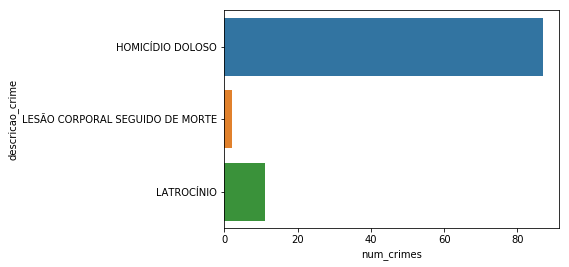

In [28]:
import seaborn as sns
sns.barplot(x="num_crimes", y="descricao_crime",data=df,orient='h')

### CIDADES COM MAIS CRIMES REGISTRADOS:

In [3]:
cidades_perigosas = pd.read_sql_query("""
                            SELECT cr.id_cidade,ci.nome_cidade,count(cr.id_cidade) as num_crimes FROM crime cr
                            INNER JOIN cidade ci on(cr.id_cidade = ci.id) GROUP BY cr.id_cidade,ci.nome_cidade 
                            ORDER BY count(*) DESC LIMIT(5)

                            """,conn)

In [4]:
cidades_perigosas

,id_cidade,nome_cidade,num_crimes
0,77,VILA VELHA,19
1,70,SERRA,12
2,17,CARIACICA,11
3,78,VITORIA,10
4,74,VIANA,6


In [11]:
df = pd.DataFrame(cidades_perigosas)

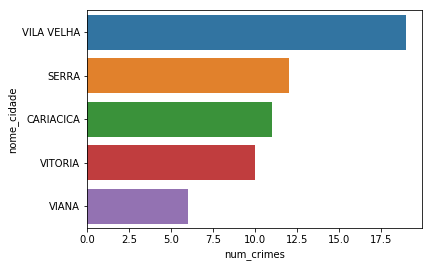

In [12]:
import seaborn as sns
sns.barplot(x="num_crimes", y="nome_cidade",data=df,orient='h')

### RUAS COM MAIS CRIMES REGISTRADOS

In [9]:
ruas_perigosas = pd.read_sql_query("""
                            SELECT cr.id_rua,ru.nome_rua,count(cr.id_rua) as num_crimes FROM crime cr
                            INNER JOIN rua ru ON(cr.id_rua = ru.id) GROUP BY cr.id_rua,ru.nome_rua
                            ORDER BY count(*) DESC LIMIT(5)

                            """,conn)

In [10]:
ruas_perigosas

,id_rua,nome_rua,num_crimes
0,38,POEIRAO,4
1,131,"RODOVIA FEDERAL BR 101, KM 308,2",4
2,2,ZONA RURAL,3
3,145,RUA SILVIO AVIDOS,2
4,73,RUA AGUA MARINHA,2


In [18]:
df = pd.DataFrame(ruas_perigosas)

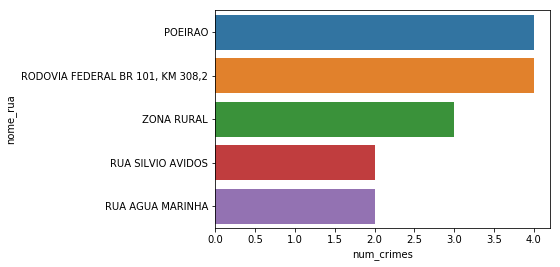

In [19]:
import seaborn as sns
sns.barplot(x="num_crimes", y="nome_rua",data=df,orient='h')